In [ ]:
# %% [code]
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import kagglehub

# Download latest version
path_to_datasets = kagglehub.dataset_download("thedevastator/airbnb-prices-in-european-cities")

print("Path to dataset files:", path_to_datasets)

list_of_dfs = []
for dataset_name in os.listdir(path_to_datasets):
  city_name = dataset_name.split("_")[0]
  is_weekend = dataset_name.split("_")[1] == "weekends.csv"

  path_to_dataset = file_path = os.path.join(path_to_datasets, dataset_name)
  df = pd.read_csv(path_to_dataset)
  df['city'] = city_name
  df['is_weekend'] = is_weekend
  list_of_dfs.append(df)

df = pd.concat(list_of_dfs, axis=0, ignore_index=True)
df

Path to dataset files: /kaggle/input/airbnb-prices-in-european-cities


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,is_weekend
0,0,536.396682,Entire home/apt,False,False,5.0,False,0,1,9.0,...,1.351201,0.212346,390.776775,19.001549,1030.738507,47.550371,2.35900,48.86800,paris,True
1,1,290.101594,Private room,False,True,2.0,True,0,0,10.0,...,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282,paris,True
2,2,445.754497,Entire home/apt,False,False,4.0,False,0,1,10.0,...,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375,paris,True
3,3,211.343089,Private room,False,True,2.0,False,0,0,10.0,...,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475,paris,True
4,4,266.334234,Entire home/apt,False,False,2.0,True,0,0,9.0,...,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384,paris,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,4609,310.449446,Private room,False,True,2.0,False,0,0,10.0,...,6.347654,0.445862,194.410695,13.513703,446.486289,7.994710,-0.21207,51.48667,london,False
51703,4610,265.057974,Entire home/apt,False,False,4.0,False,1,0,8.0,...,5.231706,0.463949,254.476513,17.688945,537.720506,9.628334,-0.05459,51.52018,london,False
51704,4611,142.289329,Private room,False,True,2.0,False,0,0,10.0,...,8.867238,2.675007,125.891017,8.750824,266.789887,4.777096,-0.12056,51.42875,london,False
51705,4612,372.304146,Private room,False,True,2.0,False,0,0,8.0,...,7.576798,1.682697,146.161215,10.159828,325.152018,5.822118,-0.12810,51.44023,london,False


In [ ]:
columns_to_drop = ['Unnamed: 0', 'room_shared', 'room_private', 'rest_index', 'attr_index']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
FINAL_TEST_PROPORTION = 0.1
final_testset = df[:int(len(df)*0.1)]
df = df[int(len(df)*0.1):]

In [ ]:
def remove_outliers_by_group(df, group_cols=['city', 'is_weekend'], value_col='realSum', verbose=True):
    cleaned_data = []

    for group_keys, group_df in df.groupby(group_cols):
        Q1 = group_df[value_col].quantile(0.25)
        Q3 = group_df[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        filtered = group_df[(group_df[value_col] >= lower) & (group_df[value_col] <= upper)]
        cleaned_data.append(filtered)

        if verbose:
          print(f"{group_keys}: removed {len(group_df) - len(filtered)} outliers")

    return pd.concat(cleaned_data, ignore_index=True)

# Clean the combined DataFrame
df_clean = remove_outliers_by_group(df)
print(f"Cleaned shape: {df_clean.shape}")


('amsterdam', np.False_): removed 47 outliers
('amsterdam', np.True_): removed 48 outliers
('athens', np.False_): removed 128 outliers
('athens', np.True_): removed 125 outliers
('barcelona', np.False_): removed 108 outliers
('barcelona', np.True_): removed 95 outliers
('berlin', np.False_): removed 73 outliers
('berlin', np.True_): removed 73 outliers
('budapest', np.False_): removed 108 outliers
('budapest', np.True_): removed 98 outliers
('lisbon', np.False_): removed 89 outliers
('lisbon', np.True_): removed 93 outliers
('london', np.False_): removed 226 outliers
('london', np.True_): removed 264 outliers
('paris', np.False_): removed 177 outliers
('paris', np.True_): removed 176 outliers
('rome', np.False_): removed 200 outliers
('rome', np.True_): removed 189 outliers
('vienna', np.False_): removed 60 outliers
('vienna', np.True_): removed 65 outliers
Cleaned shape: (44095, 17)


In [ ]:
#Fixed Bug IQR Outlier removal

import pandas as pd
from scipy.stats import median_abs_deviation

def remove_outliers_by_group(df, group_cols=['city', 'is_weekend'], threshold=3.0, verbose=True):
    """
    Removes outliers within each group based on all numeric value columns using Z-score logic.
    Skips non-numeric columns automatically.

    Parameters:
        df (DataFrame): Input dataset.
        group_cols (list): Columns to group by (e.g., ['city', 'is_weekend']).
        threshold (float): Z-score threshold for detecting outliers.

    Returns:
        DataFrame: Cleaned dataset with outliers removed.
    """
    cleaned_data = []

    # --- Select only numeric columns (exclude grouping columns like 'city' and 'is_weekend') ---
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    value_cols = [col for col in numeric_cols if col not in group_cols]

    # --- Group the data by specified columns ---
    for group_keys, group_df in df.groupby(group_cols):
        to_remove_indices = set()  # Initialize empty set to store indices of outliers

        # === (Step 1) Look at each column one by one ===
        for value_col in value_cols:
            mean = group_df[value_col].mean()
            std = group_df[value_col].std()

            if std == 0 or pd.isna(std):
                # Skip if the column has no variation
                continue

            z_scores = (group_df[value_col] - mean) / std

            # === (Step 2) Note down which rows are outliers for this column ===
            outliers = group_df[(z_scores < -threshold) | (z_scores > threshold)]
            to_remove_indices.update(outliers.index)

            # (Step 3) Finished this column; continue to next column and repeat

        # === (Step 4) After checking all columns, remove all accumulated outlier rows ===
        filtered = group_df.drop(index=to_remove_indices)
        cleaned_data.append(filtered)
        if verbose:
          print(f"{group_keys}: removed {len(to_remove_indices)} outliers")

    # --- Combine all cleaned groups back into a single DataFrame ---
    return pd.concat(cleaned_data, ignore_index=True)

# === Final Implementation ===

# Clean the DataFrame using all numeric columns automatically
df_clean = remove_outliers_by_group(df, group_cols=['city', 'is_weekend'])
print(f"Cleaned Data Shape: {df_clean.shape}")


('amsterdam', np.False_): removed 115 outliers
('amsterdam', np.True_): removed 159 outliers
('athens', np.False_): removed 168 outliers
('athens', np.True_): removed 210 outliers
('barcelona', np.False_): removed 163 outliers
('barcelona', np.True_): removed 114 outliers
('berlin', np.False_): removed 167 outliers
('berlin', np.True_): removed 127 outliers
('budapest', np.False_): removed 143 outliers
('budapest', np.True_): removed 128 outliers
('lisbon', np.False_): removed 294 outliers
('lisbon', np.True_): removed 324 outliers
('london', np.False_): removed 493 outliers
('london', np.True_): removed 562 outliers
('paris', np.False_): removed 210 outliers
('paris', np.True_): removed 251 outliers
('rome', np.False_): removed 398 outliers
('rome', np.True_): removed 401 outliers
('vienna', np.False_): removed 163 outliers
('vienna', np.True_): removed 173 outliers
Cleaned Data Shape: (41774, 17)


In [ ]:
import pandas as pd
from scipy.stats import zscore

def remove_outliers_global_z(df, threshold=3.0, verbose=True):
    """
    Removes outliers across the entire dataset based on global Z-score logic based on mean and standard deviation
    instead of IQR (based on percentiles).
    This implementation considers outliers as rows with extreme Z-scores globally (across the whole dataset),
    not group-by-group.
    """
    to_remove_indices = set()

    # --- Select only numeric columns ---
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    # === (Step 1) Look at each column one by one ===
    for value_col in numeric_cols:
        mean = df[value_col].mean()
        std = df[value_col].std()

        if std == 0 or pd.isna(std):
            continue  # Skip flat columns

        z_scores = (df[value_col] - mean) / std

        # === (Step 2) Note down rows with extreme Z-scores ===
        outliers = df[(z_scores < -threshold) | (z_scores > threshold)]
        to_remove_indices.update(outliers.index)

        # (Step 3) Finished column, move to next

    # === (Step 4) Remove accumulated outliers ===
    cleaned_df = df.drop(index=to_remove_indices)
    if verbose:
      print(f"Removed {len(to_remove_indices)} global outliers across all columns")
    return cleaned_df

# Usage
df_clean = remove_outliers_global_z(df, threshold=3.0)
print(f"Cleaned Data Shape: {df_clean.shape}")



Removed 3785 global outliers across all columns
Cleaned Data Shape: (42752, 17)


In [ ]:
import pandas as pd
from scipy.stats import zscore

def remove_outliers_grouped_z(df, group_cols=['city', 'is_weekend'], threshold=3.0, verbose=True):
    """
    - This method uses Z-scores (mean and std deviation) instead of IQR (quartile-based thresholds).
    - Outlier detection applied inside each group ('city', 'is_weekend', etc.)

    """
    cleaned_data = []

    # --- Select only numeric columns ---
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    value_cols = [col for col in numeric_cols if col not in group_cols]

    # --- Group the data by specified columns ---
    for group_keys, group_df in df.groupby(group_cols):
        to_remove_indices = set()

        # === (Step 1) Look at each column one by one ===
        for value_col in value_cols:
            mean = group_df[value_col].mean()
            std = group_df[value_col].std()

            if std == 0 or pd.isna(std):
                continue  # Skip flat columns

            z_scores = (group_df[value_col] - mean) / std

            # === (Step 2) Note down rows with extreme Z-scores in this group ===
            outliers = group_df[(z_scores < -threshold) | (z_scores > threshold)]
            to_remove_indices.update(outliers.index)

            # (Step 3) Finished column, move to next

        # === (Step 4) Remove accumulated outliers for this group ===
        filtered = group_df.drop(index=to_remove_indices)
        cleaned_data.append(filtered)
        if verbose:
          print(f"{group_keys}: removed {len(to_remove_indices)} group-wise outliers")

    # --- Combine all cleaned groups back into a single DataFrame ---
    return pd.concat(cleaned_data, ignore_index=True)

# Usage
df_clean = remove_outliers_grouped_z(df, group_cols=['city', 'is_weekend'], threshold=3.0)
print(f"Cleaned Data Shape: {df_clean.shape}")


('amsterdam', np.False_): removed 115 group-wise outliers
('amsterdam', np.True_): removed 159 group-wise outliers
('athens', np.False_): removed 168 group-wise outliers
('athens', np.True_): removed 210 group-wise outliers
('barcelona', np.False_): removed 163 group-wise outliers
('barcelona', np.True_): removed 114 group-wise outliers
('berlin', np.False_): removed 167 group-wise outliers
('berlin', np.True_): removed 127 group-wise outliers
('budapest', np.False_): removed 143 group-wise outliers
('budapest', np.True_): removed 128 group-wise outliers
('lisbon', np.False_): removed 294 group-wise outliers
('lisbon', np.True_): removed 324 group-wise outliers
('london', np.False_): removed 493 group-wise outliers
('london', np.True_): removed 562 group-wise outliers
('paris', np.False_): removed 210 group-wise outliers
('paris', np.True_): removed 251 group-wise outliers
('rome', np.False_): removed 398 group-wise outliers
('rome', np.True_): removed 401 group-wise outliers
('vienna'

In [ ]:
import pandas as pd
from IPython.display import display

def apply_pipeline_ready_feature_engineering(df):
    df_copy = df.copy()
    zone_labels = ['Zone_1', 'Zone_2', 'Zone_3', 'Zone_4']

    for city in df_copy['city'].unique():
        df_city = df_copy[df_copy['city'] == city]

        # ChatGPT was prompted to debug check for NaN instances
        #Debug checks
        attr_std = df_city['attr_index_norm'].std()
        rest_std = df_city['rest_index_norm'].std()
        attr_all_nan = df_city['attr_index_norm'].isna().all()
        rest_all_nan = df_city['rest_index_norm'].isna().all()

        print(f"\n=== {city.upper()} ===")
        print(f"attr_index_norm std: {attr_std}, all NaN: {attr_all_nan}")
        print(f"rest_index_norm std: {rest_std}, all NaN: {rest_all_nan}")

        # Create city-specific distance bins
        dist_bins = pd.qcut(df_city['dist'], q=4, labels=zone_labels, duplicates='drop')
        df_copy.loc[df_city.index, 'distance_zone'] = dist_bins.astype(str)

        # Practical listing criteria
        metro_threshold_km = 0.83
        practical = (
            (df_city['host_is_superhost'] == True) &
            (df_city['metro_dist'] <= metro_threshold_km) &
            (df_city['cleanliness_rating'] >= 7) &
            (df_city['guest_satisfaction_overall'] >= 70)
        )
        # ChatGPT was prompted to check and remove NaN instances
        df_copy.loc[df_city.index, 'practical_flag'] = practical.fillna(False).astype(int)

        # Attractive listing criteria using 75th percentile per city
        attr_thresh = df_city['attr_index_norm'].quantile(0.75)
        rest_thresh = df_city['rest_index_norm'].quantile(0.75)
        print(f"75th percentile thresholds — attr: {attr_thresh}, rest: {rest_thresh}")

        attractive = (
            (df_city['attr_index_norm'] >= attr_thresh) &
            (df_city['rest_index_norm'] >= rest_thresh) &
            (df_city['cleanliness_rating'] >= 7) &
            (df_city['guest_satisfaction_overall'] >= 70)
        )
        df_copy.loc[df_city.index, 'attractive_flag'] = attractive.fillna(False).astype(int)
    # ChatGPT was prompted to check and remove NaN instances
    # Final safeguard — drop any columns with any NaN values
    df_copy = df_copy.dropna(axis=1)

    display(df_copy[['city', 'distance_zone', 'practical_flag', 'attractive_flag']].sample(10))
    return df_copy


In [ ]:
df.head()

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,city,is_weekend
5170,854.143878,Entire home/apt,6.0,False,0,1,10.0,100.0,2,4.291404,0.797886,5.797475,7.440992,2.21561,41.40489,barcelona,False
5171,105.278000,Private room,2.0,False,1,0,9.0,92.0,1,2.254071,0.672636,9.930547,17.794588,19.02500,47.49423,budapest,True
5172,315.034020,Entire home/apt,2.0,False,0,0,10.0,90.0,0,1.702224,0.054911,34.926213,60.341253,2.33404,48.86563,paris,True
5173,117.967759,Entire home/apt,4.0,True,0,0,10.0,99.0,0,1.510858,0.262025,11.233877,28.318318,19.06984,47.50709,budapest,False
5174,646.534490,Entire home/apt,5.0,False,0,1,2.0,20.0,2,1.964953,0.175079,36.050302,14.742430,-0.13300,51.49100,london,True


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class GroupStandardScaler(StandardScaler):
    def __init__(self, group_column=None, *args, **kwargs):
        # group_column is optional; if None, it behaves like StandardScaler
        self.group_column = group_column
        super().__init__(*args, **kwargs)

    def fit(self, X, y=None):
        # Ensure X is a DataFrame
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X must be a pandas DataFrame")

        # Extract numerical columns
        num_cols = X.select_dtypes(include=[np.number]).columns

        if self.group_column is not None:
            # Group by the categorical column and calculate statistics for each group
            grouped = X.groupby(self.group_column)[num_cols].agg(['mean', 'std'])
            # Store the grouped statistics for use during transformation
            self.group_stats_ = grouped
        else:
            # If no grouping column is provided, calculate overall statistics
            self.group_stats_ = X[num_cols].agg(['mean', 'std'])

        return self

    def transform(self, X):
        # Ensure X is a DataFrame
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X must be a pandas DataFrame")

        # Extract numerical columns
        num_cols = X.select_dtypes(include=[np.number]).columns

        # Initialize an empty dataframe for normalized values
        X_scaled = X.copy()

        # Normalize the numerical columns
        for col in num_cols:
            if self.group_column is not None:
                # Group statistics for the current column
                means = self.group_stats_[(col, 'mean')]
                stds = self.group_stats_[(col, 'std')]

                # Find the groups for each row in X
                group_values = X[self.group_column]

                # Apply the group-based normalization
                X_scaled[col] = (X[col] - group_values.map(means)) / group_values.map(stds)
            else:
                # Apply global normalization (like StandardScaler)
                means = self.group_stats_[col].loc['mean']
                stds = self.group_stats_[col].loc['std']
                X_scaled[col] = (X[col] - means) / stds

        return X_scaled

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

from sklearn.preprocessing import OneHotEncoder
def get_hierarchical_sets(df, normalizer, feat_engineer=None, train=0.8, val=0.1, test=0.1):
  """
    Takes a dataframe as input and splits it for hierarchical cv
    Returns a dict with these:
      train_set : df used to train models
      val_set : df used to choose prep methods
      test_set : df used for choose model
  """
  df = df.sample(frac=1, random_state=42).reset_index(drop=True)

  leng = len(df)

  train_idx = int(leng*train)
  val_idx = train_idx + int(leng*val)
  test_idx = val_idx + int(leng*test)

  normalizer.fit(df[:train_idx])
  df = normalizer.transform(df)

  df = pd.get_dummies(df, drop_first=True)

  # for any feature engineering or dimensionality reduction methods
  if feat_engineer is not None:
    target = df[['realSum']]
    df = df.drop(columns=['realSum'], axis=1)
    feat_engineer.fit(df[:train_idx])
    df = feat_engineer.transform(df)
    df = pd.DataFrame(df, columns=feat_engineer.get_feature_names_out())
    df = pd.concat([target, df], axis=1)

  dfs = {
      'train_set' : df[:train_idx],
      'val_set' : df[train_idx: val_idx],
      'test_set' : df[val_idx: test_idx],
  }

  return dfs

def split_by(df, by, outlier_remover):
  """
    Takes a dataframe as input and column to split values by
    Returns separate dataframes grouped by unique values in that column
  """
  values = df[by].unique()
  groups = [df[df[by]==val] for val in values]
  groups = [outlier_remover(group, verbose=False) for group in groups]

  return dict(zip(values, groups))

def get_dfs(df):
  """
    dfs is a dictionary of dictionaries
    the keys are like barcelona, budapest, ..., all_global, all_grouped
    the values are a dictionary with keys: train, val, test, final sets
    so doing df['barcelona']['train_set'] is saying "get the train set for barcelona
  """
  dfs = split_by(df, 'city', remove_outliers_global_z)

  # All the cities dataframes
  for key in dfs.keys():
    dfs[key] = pd.get_dummies(dfs[key], drop_first=False)
    dfs[key] = get_hierarchical_sets(dfs[key], GroupStandardScaler())

  # Dataframe with all cities, normalized globally
  dfs['all_global'] = remove_outliers_global_z(df, verbose=False)
  dfs['all_global'] = get_hierarchical_sets(dfs['all_global'], GroupStandardScaler())

  # Dataframe with all cities, normalized by city
  dfs['all_grouped'] = remove_outliers_grouped_z(df, group_cols=['city'], verbose=False)
  dfs['all_grouped'] = get_hierarchical_sets(dfs['all_grouped'], GroupStandardScaler('city'))
  return dfs

# Usage
dfs = get_dfs(df)
dfs_engineered = get_dfs(apply_pipeline_ready_feature_engineering(df))
dfs['london']['val_set'].head()


=== BARCELONA ===
attr_index_norm std: 9.5465001647249, all NaN: False
rest_index_norm std: 10.335579501258895, all NaN: False
75th percentile thresholds — attr: 21.47409773787867, rest: 26.894437037150773

=== BUDAPEST ===
attr_index_norm std: 6.729371346888208, all NaN: False
rest_index_norm std: 19.052791396026414, all NaN: False
75th percentile thresholds — attr: 15.737138876563431, rest: 50.06036078119522

=== PARIS ===
attr_index_norm std: 7.738067122164854, all NaN: False
rest_index_norm std: 15.596909824232936, all NaN: False
75th percentile thresholds — attr: 22.154006133622723, rest: 52.918403372263

=== LONDON ===
attr_index_norm std: 11.971788260936385, all NaN: False
rest_index_norm std: 6.9959091597944285, all NaN: False
75th percentile thresholds — attr: 25.083023307875756, rest: 13.766969008055234

=== ROME ===
attr_index_norm std: 6.6967417723147875, all NaN: False
rest_index_norm std: 13.446997210416724, all NaN: False
75th percentile thresholds — attr: 13.9289163769

,city,distance_zone,practical_flag,attractive_flag
12071,london,Zone_2,0.0,0.0
44840,vienna,Zone_3,0.0,0.0
31240,amsterdam,Zone_3,0.0,0.0
41435,lisbon,Zone_3,0.0,0.0
46796,paris,Zone_3,0.0,0.0
42731,lisbon,Zone_2,0.0,0.0
23121,barcelona,Zone_3,0.0,0.0
47395,london,Zone_4,0.0,0.0
26017,budapest,Zone_2,1.0,0.0
7646,berlin,Zone_2,0.0,0.0


,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,is_weekend,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_london
6345,-0.839244,-0.652743,False,-0.621465,-0.788302,0.816874,0.96802,-0.145381,0.138563,-0.618963,-0.541238,-0.512947,-0.657766,1.531712,False,False,True,False,True
6346,-0.851894,-0.652743,False,-0.621465,1.268349,-0.279375,-0.17924,-0.145381,1.361403,-0.559214,-1.009745,-1.077661,1.695483,0.690329,False,False,True,False,True
6347,0.913893,1.065073,False,-0.621465,1.268349,0.816874,0.96802,-0.145381,-0.968759,-0.348976,1.112572,0.797538,-0.700488,-0.388244,False,True,False,False,True
6348,-0.535634,-0.652743,False,-0.621465,-0.788302,0.816874,0.96802,-0.145381,-0.532013,1.176229,-0.075616,-0.197796,-0.553530,-0.903010,True,False,True,False,True
6349,-0.475545,-0.652743,False,-0.621465,1.268349,0.816874,0.39439,-0.145381,-1.263358,-0.252656,0.948819,1.172751,0.124723,0.765653,False,False,True,False,True


In [ ]:
def train_and_evaluate_models(dfs, train_list, eval_set, random_state=42):
    import pandas as pd
    import numpy as np
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import LassoCV

    results = {}

    for group_name in dfs.keys():
        group = dfs[group_name]

        # Concatenate training sets
        X_train_list = [group[ds_name] for ds_name in train_list]
        X_train_full = pd.concat(X_train_list)

        # Separate features and targets
        X_train, y_train = X_train_full.iloc[:, 1:], X_train_full.iloc[:, 0]
        X_val, y_val = group[eval_set].iloc[:, 1:], group[eval_set].iloc[:, 0]
        #ChatGPT was prompted to check and remove NaN instances
        print(f"\n===== Group: {group_name} =====")
        print(f"NaNs in X_train? {X_train.isna().any().any()}")
        print(f"NaNs in X_val?   {X_val.isna().any().any()}")
        #
        # Drop columns with all NaNs in either train or validation
        nan_cols_train = X_train.columns[X_train.isna().all()]
        nan_cols_val = X_val.columns[X_val.isna().all()]
        all_nan_cols = set(nan_cols_train).union(set(nan_cols_val))
        if all_nan_cols:
            print(f"Dropping columns with ALL NaNs: {list(all_nan_cols)}")
            X_train = X_train.drop(columns=all_nan_cols)
            X_val = X_val.drop(columns=all_nan_cols)

        # Drop rows that still contain any NaNs
        if X_train.isna().any().any() or X_val.isna().any().any():
            print(f"Dropping rows with ANY NaNs for group {group_name}")
            combined = pd.concat([X_train, X_val], keys=["train", "val"])
            combined = combined.dropna()
            X_train = combined.xs("train")
            X_val = combined.xs("val")
            y_train = y_train.loc[X_train.index]
            y_val = y_val.loc[X_val.index]

        # Define models
        models = {
            "Decision Tree": DecisionTreeRegressor(random_state=random_state),
            "Random Forest": RandomForestRegressor(random_state=random_state),
            "Lasso Regression": LassoCV(cv=5, random_state=random_state)
        }

        group_results = {}
        for model_name, model in models.items():
            print(f"\n--- Training {model_name} ---")
            model.fit(X_train, y_train)
            preds = model.predict(X_val)
            ssr_val = np.sum((y_val - preds) ** 2)

            group_results[model_name] = {
                "model": model,
                "SSR_val": ssr_val
            }

        results[group_name] = group_results

    return results


In [ ]:
train_results = train_and_evaluate_models(dfs, ['train_set'], 'val_set')

for group_name, models in train_results.items():
    print(f"{group_name}")
    for model_name, info in models.items():
        print(f"  {model_name:15s} SSR_val = {info['SSR_val']:.3f}")


===== Group: barcelona =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: budapest =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: paris =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: london =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: rome =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: athens =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---



In [ ]:
train_results_engi = train_and_evaluate_models(dfs_engineered, ['train_set'], 'val_set')

for group_name, models in train_results_engi.items():
    print(f"{group_name}")
    for model_name, info in models.items():
        print(f"  {model_name:15s} SSR_val = {info['SSR_val']:.3f}")


===== Group: barcelona =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: budapest =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: paris =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: london =====
NaNs in X_train? True
NaNs in X_val?   True
Dropping columns with ALL NaNs: ['practical_flag']

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: rome =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: athens =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training De

In [ ]:
train_dict = {city: sub['train_set'] for city, sub in dfs.items()}
val_dict = {city: sub['val_set']   for city, sub in dfs.items()}

Weighted SSR (cities)
  Decision Tree   --> 202.315
  Random Forest   --> 126.714
  Lasso Regression --> 227.058
Weighted SSR (grouped)
  Decision Tree   --> 2352.425
  Random Forest   --> 1359.204
  Lasso Regression --> 2480.668
Weighted SSR (global)
  Decision Tree   --> 1581.977
  Random Forest   --> 856.789
  Lasso Regression --> 1813.894


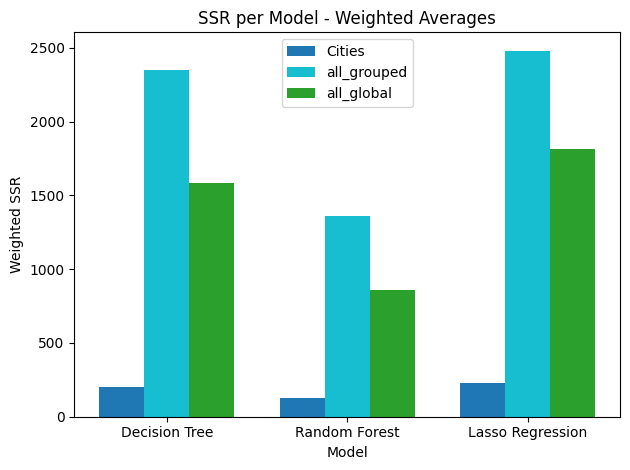

In [ ]:
def get_wa_from_results(train_results):
  weights = {city: len(val_df) for city, val_df in val_dict.items()}
  # separating the dicts before weighted average computation, to ensure there's no cross-contamination
  keys_cities = ['all_grouped', 'all_global']
  weights_cities = {k: v for k, v in weights.items() if k not in keys_cities}
  total_weights_cities = sum(weights_cities.values())

  keys_global = ['barcelona', 'budapest', 'paris', 'london', 'rome', 'athens', 'lisbon', 'amsterdam', 'berlin', 'vienna', 'all_grouped']
  weight_global = {k: v for k, v in weights.items() if k not in keys_global}

  keys_grouped = ['barcelona', 'budapest', 'paris', 'london', 'rome', 'athens', 'lisbon', 'amsterdam', 'berlin', 'vienna', 'all_global']
  weight_grouped = {k: v for k, v in weights.items() if k not in keys_grouped}

  model_names = train_results[next(iter(train_results))].keys()

  weight_sets = {
      "cities":      weights_cities,
      "grouped":     weight_grouped,
      "global":      weight_global
  }

  weighted_ssr_sets = {}

  for set_name, wdict in weight_sets.items():
      total_w = sum(wdict.values())
      ws = {}
      for model in model_names:
          num = sum(train_results[city][model]["SSR_val"] * w
                    for city, w in wdict.items())
          ws[model] = num / total_w
      weighted_ssr_sets[set_name] = ws

  for set_name, ws in weighted_ssr_sets.items():
      print(f"Weighted SSR ({set_name})")
      for model, val in ws.items():
          print(f"  {model:15s} --> {val:.3f}")
  wa_cities  = weighted_ssr_sets["cities"]
  wa_grouped = weighted_ssr_sets["grouped"]
  wa_global  = weighted_ssr_sets["global"]

  models = list(wa_cities.keys())
  x = np.arange(len(models))
  width = 0.25

  colors = {
      'cities':      '#1f77b4',
      'all_grouped': '#17becf',
      'all_global':  '#2ca02c'
  }

  fig, ax = plt.subplots()
  ax.bar(x - width, [wa_cities[m]  for m in models], width,
        label='Cities',      color=colors['cities'])
  ax.bar(x,          [wa_grouped[m] for m in models], width,
        label='all_grouped', color=colors['all_grouped'])
  ax.bar(x + width,  [wa_global[m]  for m in models], width,
        label='all_global',  color=colors['all_global'])

  ax.set_xticks(x)
  ax.set_xticklabels(models)
  ax.set_xlabel('Model')
  ax.set_ylabel('Weighted SSR')
  ax.set_title('SSR per Model - Weighted Averages')
  ax.legend()
  plt.tight_layout()
  plt.show()

get_wa_from_results(train_results)

Weighted SSR (cities)
  Decision Tree   --> 224.581
  Random Forest   --> 136.383
  Lasso Regression --> 227.673
Weighted SSR (grouped)
  Decision Tree   --> 2175.616
  Random Forest   --> 1199.461
  Lasso Regression --> 2089.677
Weighted SSR (global)
  Decision Tree   --> 1535.860
  Random Forest   --> 859.647
  Lasso Regression --> 1812.749


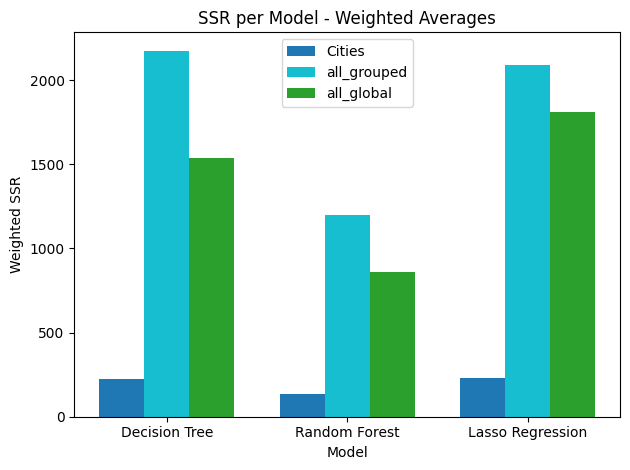

In [ ]:
get_wa_from_results(train_results_engi)

In [ ]:
def plot_residuals_per_model(dfs, train_results):
    """
    Plots residuals (y_true - y_pred) for each model and city.

    Parameters:
    - dfs: original data dictionary, with keys: city -> {'train_set': ..., 'val_set': ...}
    - city_results: nested dict of trained models from train_and_evaluate_models()
    """

    for city, models in train_results.items():
        val_df = dfs[city]['val_set']
        X_val = val_df.iloc[:, 1:]
        y_val = val_df.iloc[:, 0]

        # # For Lasso, scale features
        # from sklearn.preprocessing import StandardScaler
        # scaler = StandardScaler().fit(dfs[city]['train_set'].iloc[:, 1:])
        # X_val_scaled = scaler.transform(X_val)

        for name, info in models.items():
            model = info["model"]
            preds = model.predict(X_val)

            residuals = y_val - preds

            # Plot
            plt.figure(figsize=(6, 4))
            plt.scatter(preds, residuals, alpha=0.6)
            plt.axhline(0, color='red', linestyle='--', linewidth=1)
            plt.title(f"Residuals: {name} - {city}")
            plt.xlabel("Predicted")
            plt.ylabel("Residuals")

<ipython-input-19-948fdd5e0b50>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 4))


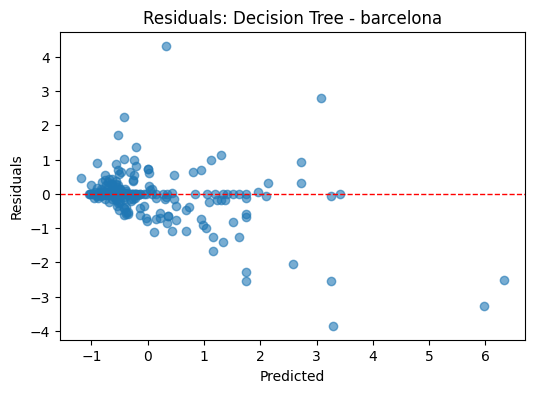

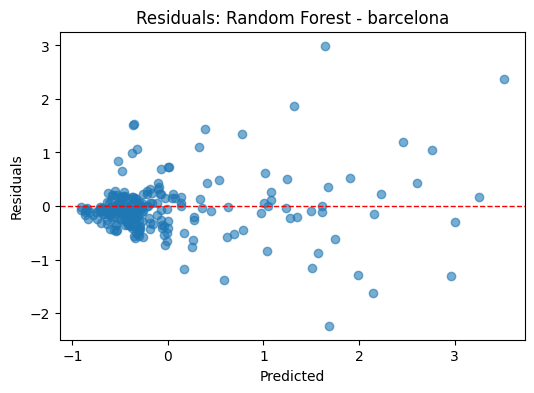

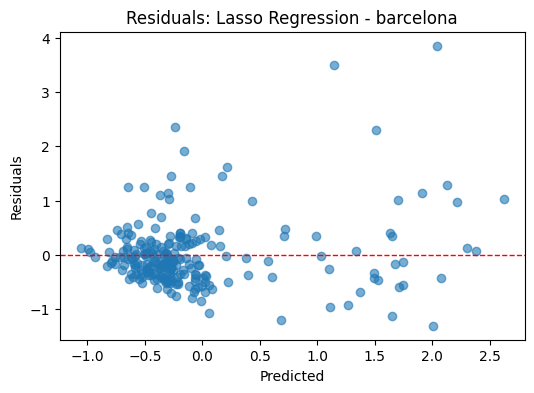

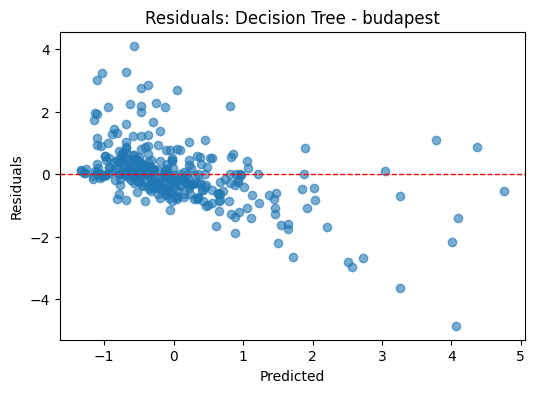

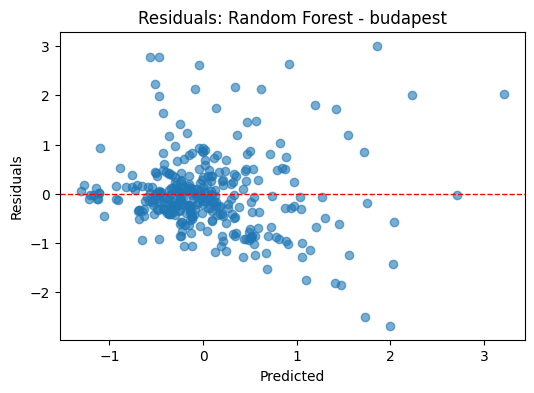

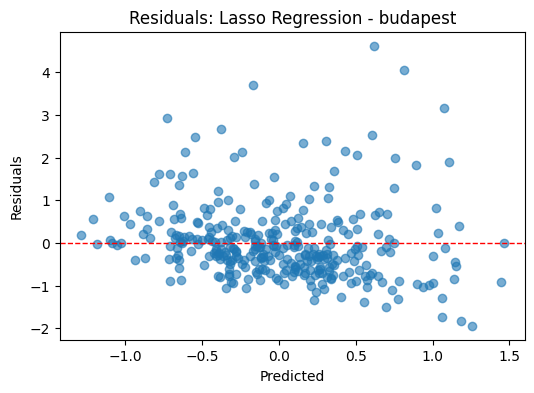

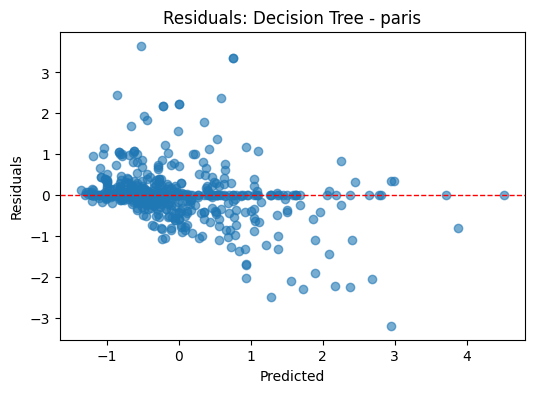

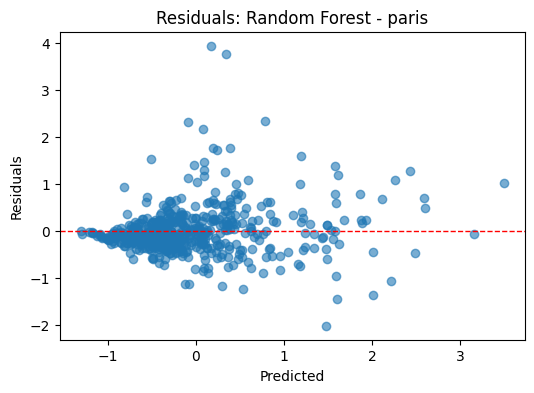

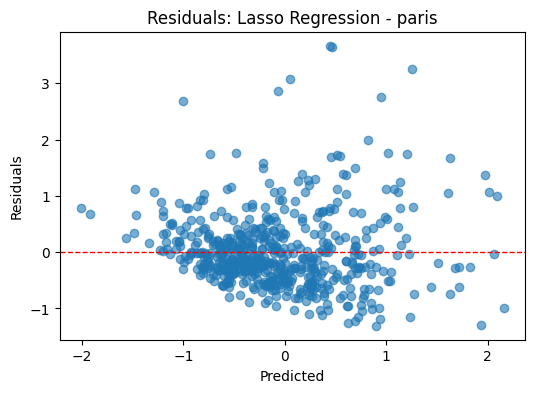

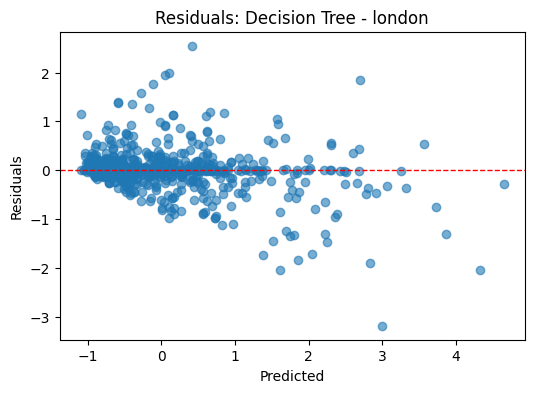

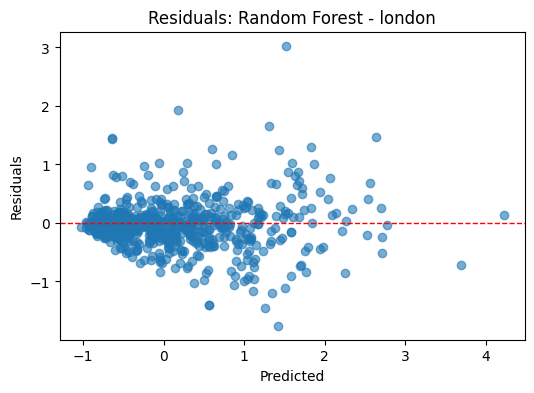

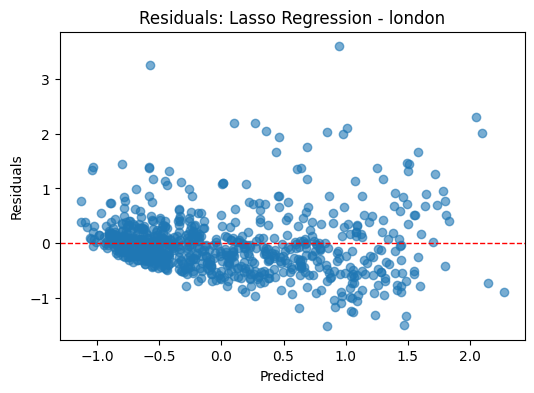

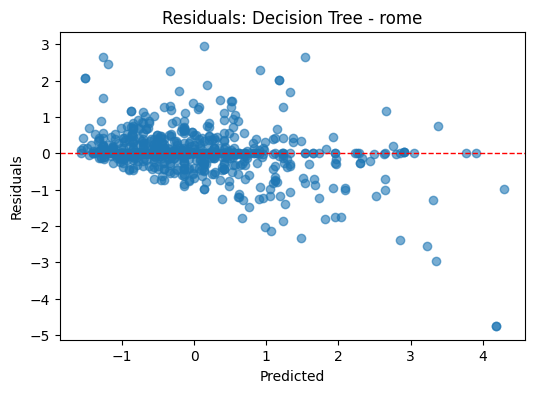

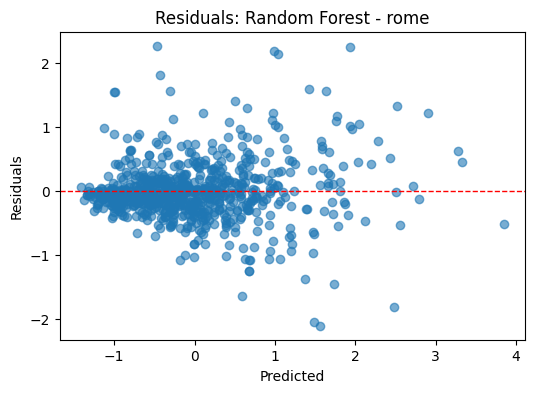

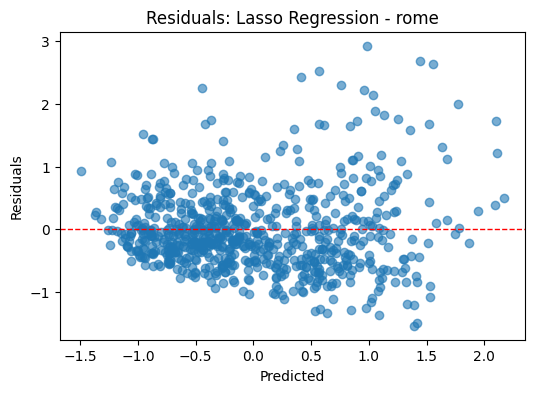

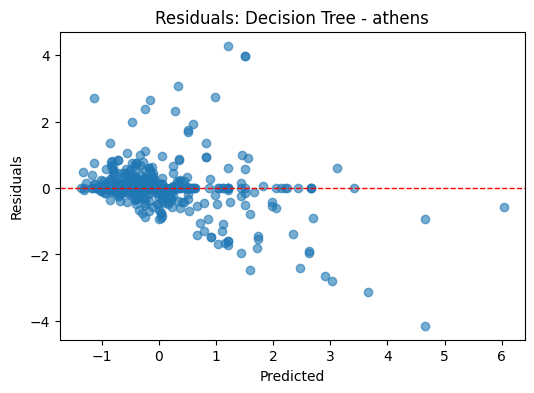

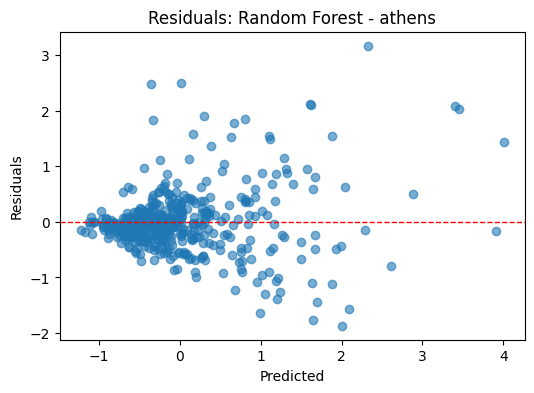

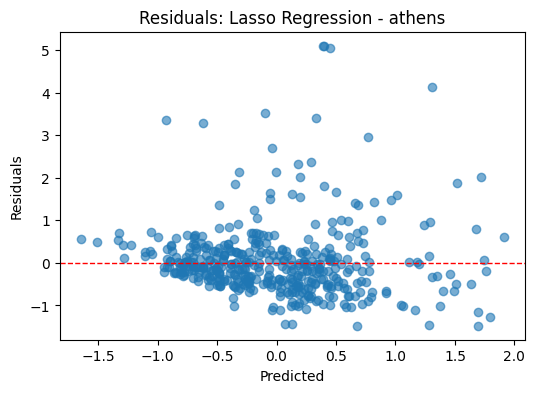

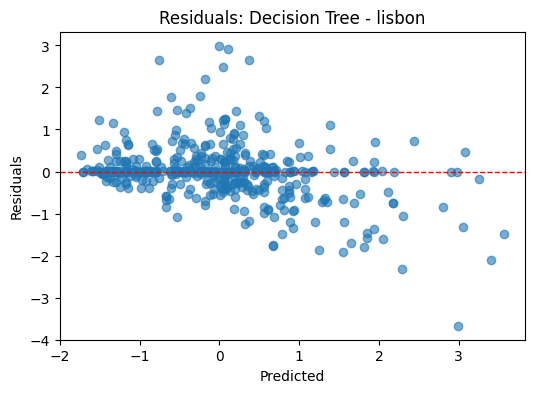

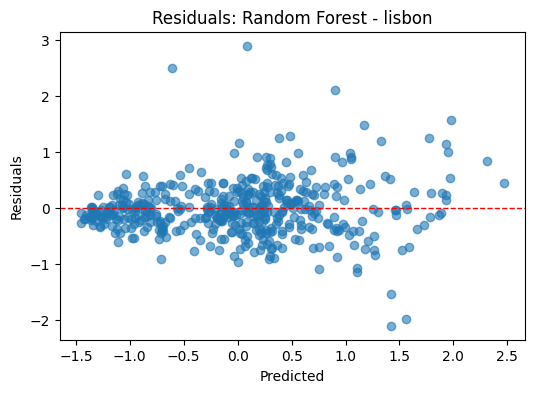

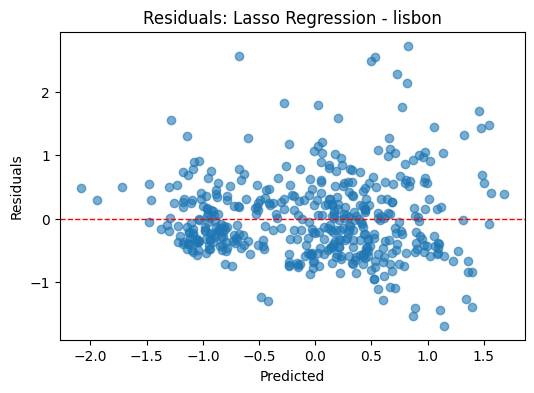

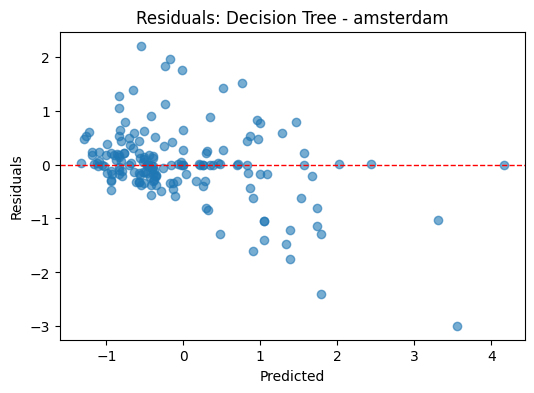

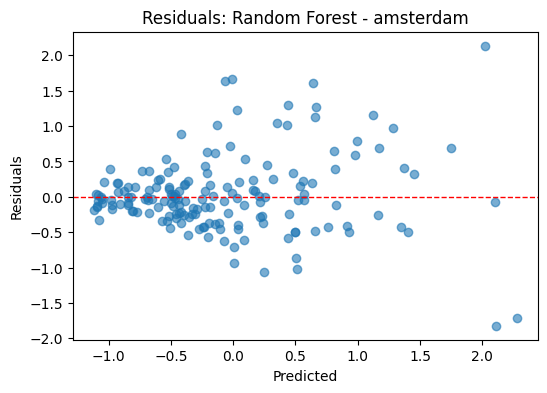

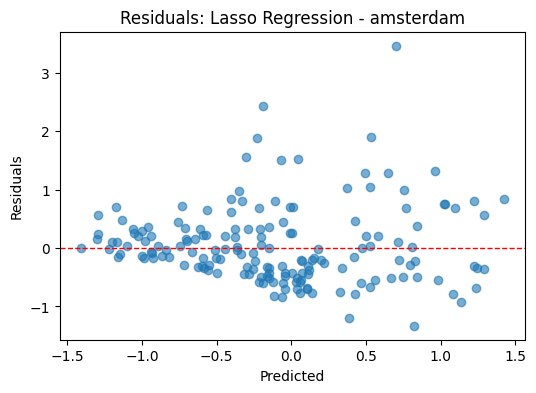

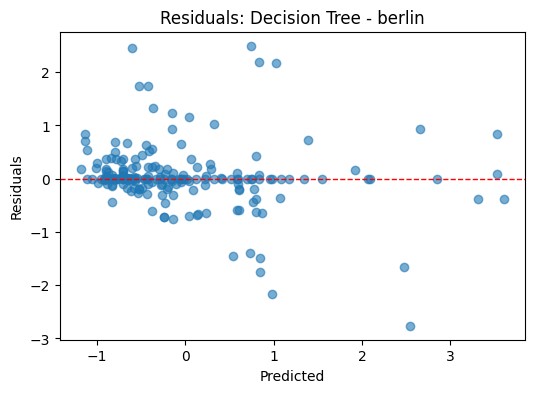

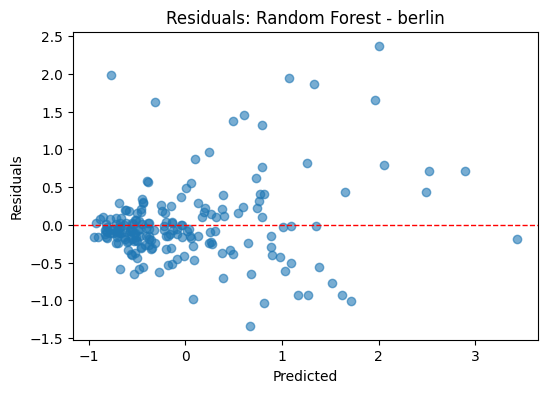

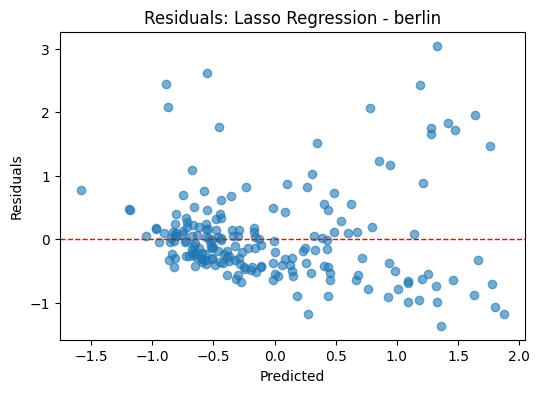

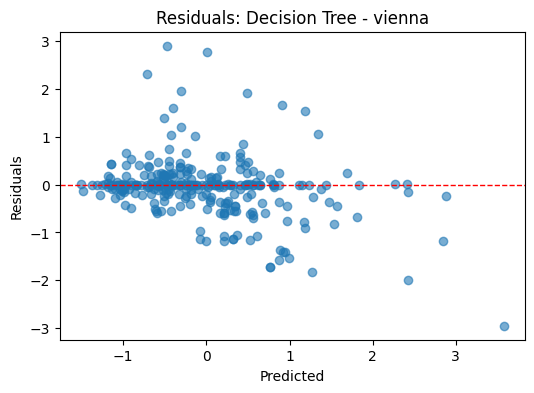

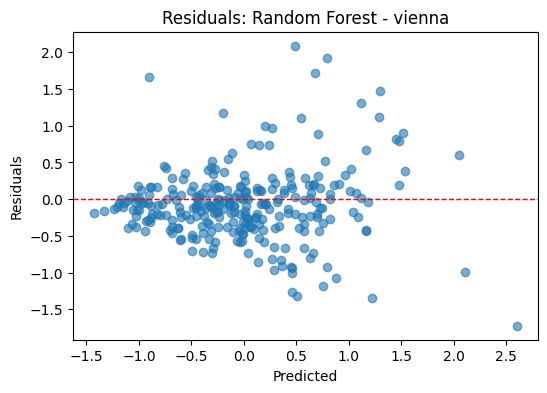

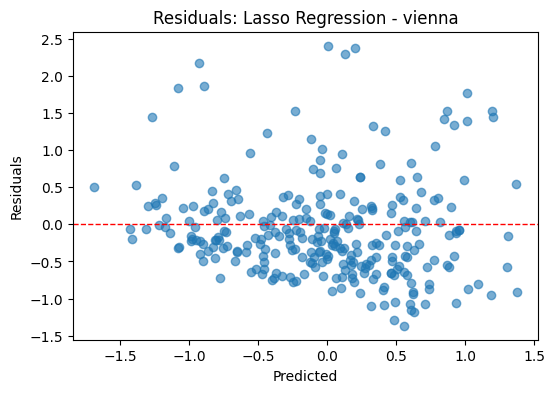

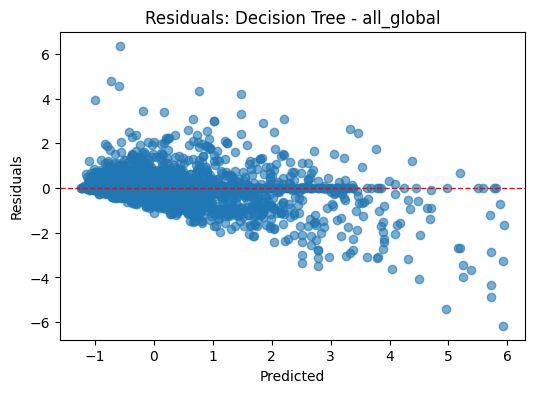

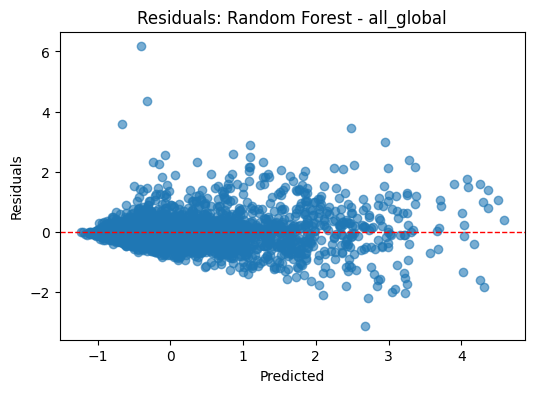

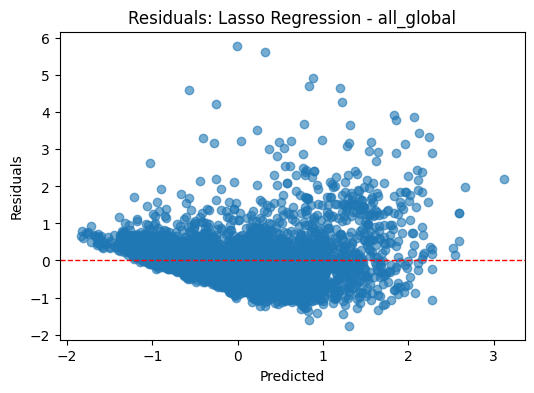

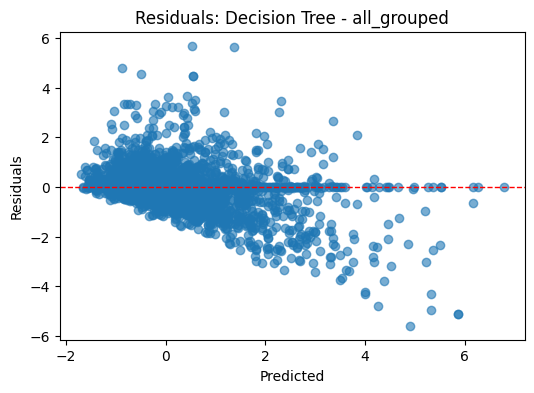

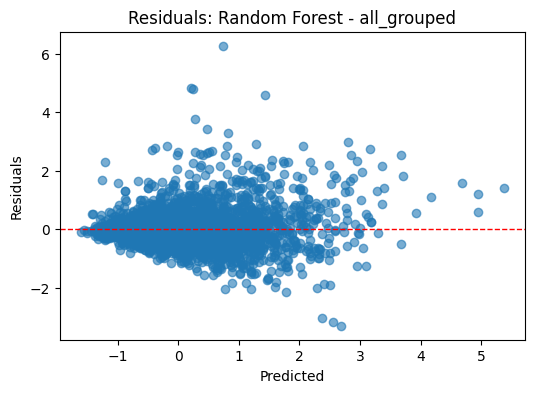

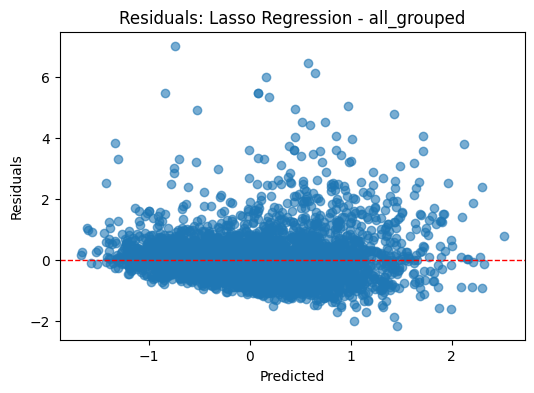

In [ ]:
plot_residuals_per_model(dfs, train_results)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- practical_flag


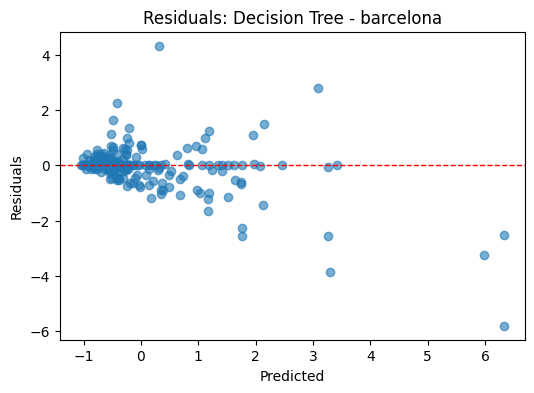

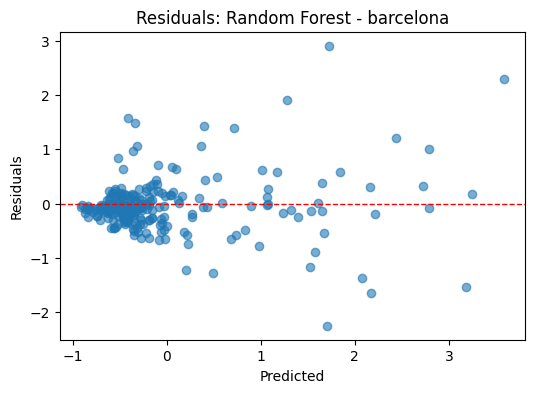

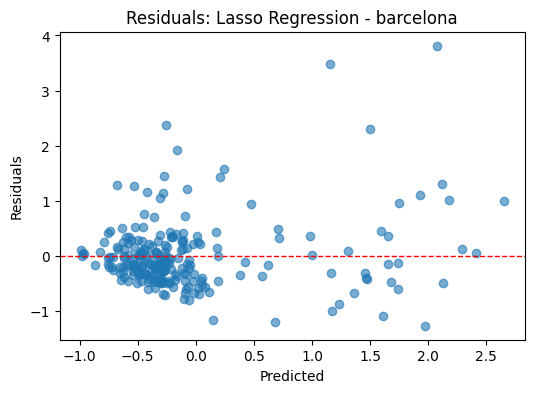

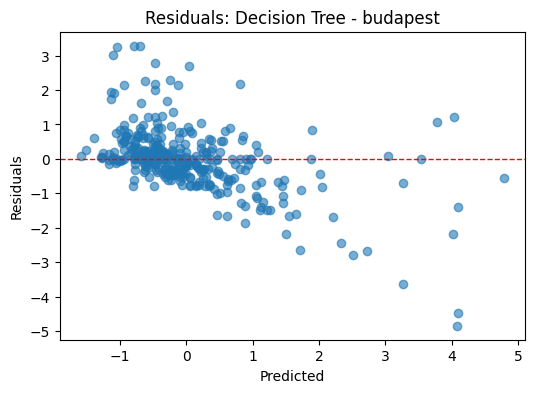

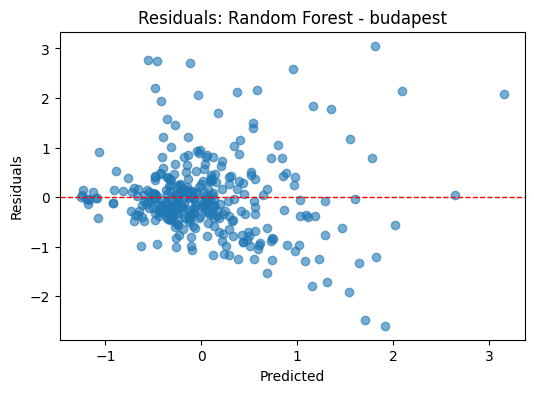

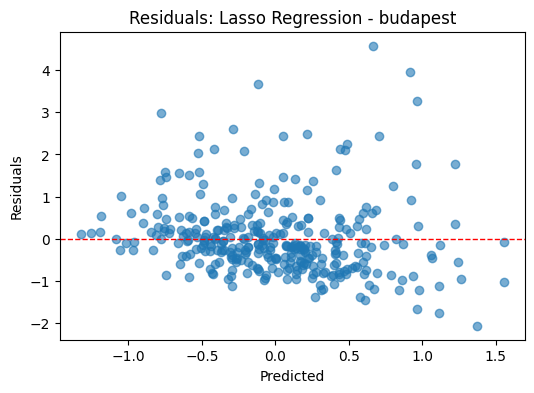

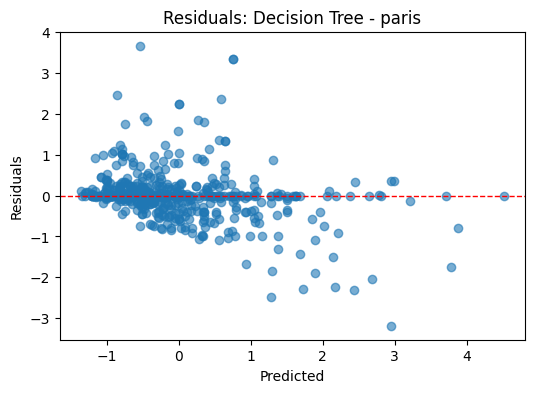

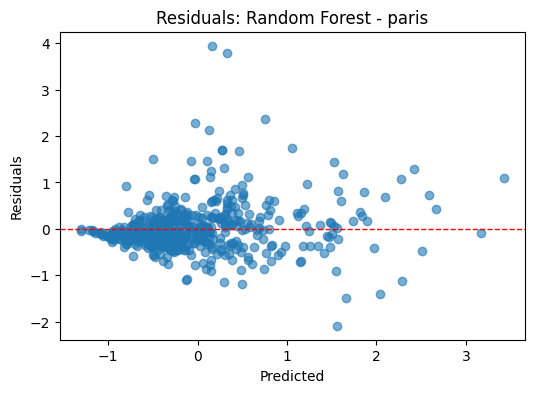

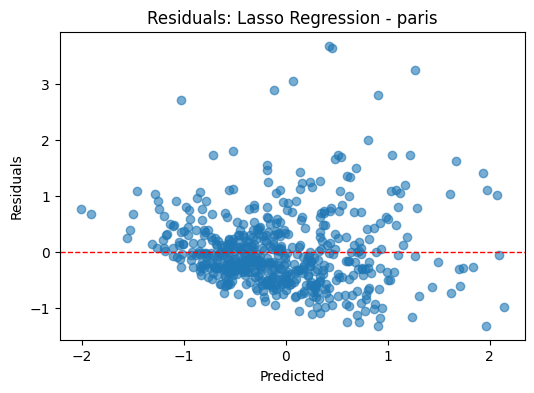

In [ ]:
plot_residuals_per_model(dfs_engineered, train_results_engi)


===== Group: barcelona =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: budapest =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: paris =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: london =====
NaNs in X_train? True
NaNs in X_val?   True
Dropping columns with ALL NaNs: ['practical_flag']

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: rome =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: athens =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training De

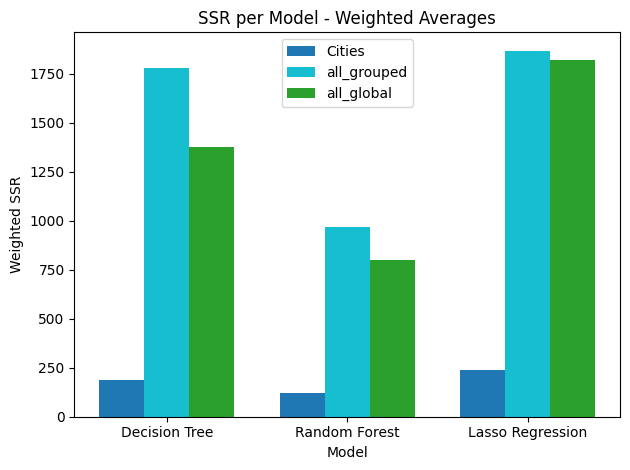

In [ ]:
test_results = train_and_evaluate_models(dfs_engineered, ['train_set', 'val_set'], 'test_set')
get_wa_from_results(test_results)


=== BARCELONA ===
attr_index_norm std: 9.5465001647249, all NaN: False
rest_index_norm std: 10.335579501258895, all NaN: False
75th percentile thresholds — attr: 21.47409773787867, rest: 26.894437037150773

=== BUDAPEST ===
attr_index_norm std: 6.729371346888208, all NaN: False
rest_index_norm std: 19.052791396026414, all NaN: False
75th percentile thresholds — attr: 15.737138876563431, rest: 50.06036078119522

=== PARIS ===
attr_index_norm std: 7.738067122164854, all NaN: False
rest_index_norm std: 15.596909824232936, all NaN: False
75th percentile thresholds — attr: 22.154006133622723, rest: 52.918403372263

=== LONDON ===
attr_index_norm std: 11.971788260936385, all NaN: False
rest_index_norm std: 6.9959091597944285, all NaN: False
75th percentile thresholds — attr: 25.083023307875756, rest: 13.766969008055234

=== ROME ===
attr_index_norm std: 6.6967417723147875, all NaN: False
rest_index_norm std: 13.446997210416724, all NaN: False
75th percentile thresholds — attr: 13.9289163769

,city,distance_zone,practical_flag,attractive_flag
42944,paris,Zone_2,0.0,0.0
30417,rome,Zone_4,0.0,0.0
50284,barcelona,Zone_1,0.0,1.0
12073,rome,Zone_1,0.0,0.0
50660,london,Zone_3,0.0,0.0
17941,london,Zone_4,0.0,0.0
43307,athens,Zone_2,1.0,0.0
49607,budapest,Zone_2,0.0,0.0
30260,london,Zone_2,0.0,0.0
50454,amsterdam,Zone_2,0.0,0.0



=== LISBON ===
attr_index_norm std: 4.705831835381629, all NaN: False
rest_index_norm std: 17.86430591138023, all NaN: False
75th percentile thresholds — attr: 8.886866153364267, rest: 36.09147837686605

=== LONDON ===
attr_index_norm std: 11.398772902683808, all NaN: False
rest_index_norm std: 6.674794695218135, all NaN: False
75th percentile thresholds — attr: 25.669072216987942, rest: 13.899033046358408

=== ROME ===
attr_index_norm std: 5.987905467454996, all NaN: False
rest_index_norm std: 13.054555608314933, all NaN: False
75th percentile thresholds — attr: 13.526775133860546, rest: 31.69986437267012

=== PARIS ===
attr_index_norm std: 7.948384364101479, all NaN: False
rest_index_norm std: 16.40860949298545, all NaN: False
75th percentile thresholds — attr: 22.393650946810475, rest: 54.5536409478637

=== BUDAPEST ===
attr_index_norm std: 6.153618010139658, all NaN: False
rest_index_norm std: 19.43328417264856, all NaN: False
75th percentile thresholds — attr: 16.845340449886326,

,city,distance_zone,practical_flag,attractive_flag
371,paris,Zone_1,0.0,0.0
233,barcelona,Zone_4,0.0,0.0
1977,lisbon,Zone_1,0.0,0.0
3004,london,Zone_3,0.0,0.0
3393,rome,Zone_4,0.0,0.0
3416,budapest,Zone_3,0.0,0.0
4436,london,Zone_1,0.0,0.0
1920,london,Zone_1,0.0,1.0
3012,athens,Zone_1,1.0,1.0
3007,rome,Zone_2,0.0,1.0



===== Group: barcelona =====
NaNs in X_train? True
NaNs in X_val?   False
Dropping columns with ALL NaNs: ['room_type_Shared room']

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: budapest =====
NaNs in X_train? True
NaNs in X_val?   False
Dropping columns with ALL NaNs: ['room_type_Shared room']

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: paris =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: london =====
NaNs in X_train? False
NaNs in X_val?   False

--- Training Decision Tree ---

--- Training Random Forest ---

--- Training Lasso Regression ---

===== Group: rome =====
NaNs in X_train? True
NaNs in X_val?   False
Dropping columns with ALL NaNs: ['room_type_Shared room']

--- Training Decision Tree ---

--- Training Random Forest ---

-

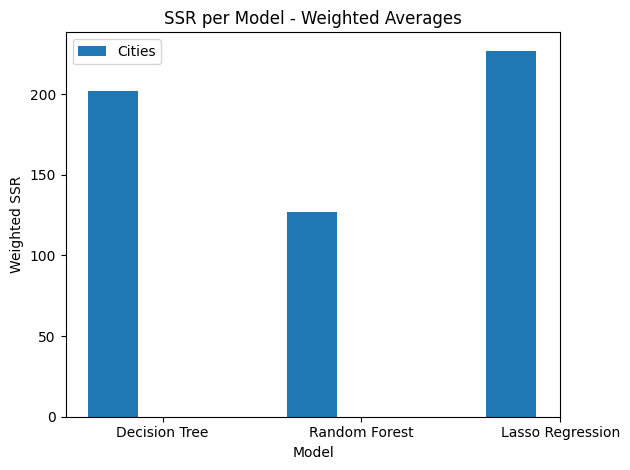

In [ ]:
def final_eval(df, final_testset):
  apply_pipeline_ready_feature_engineering(df)
  apply_pipeline_ready_feature_engineering(final_testset)
  final_test_dfs = split_by(
      df,
      'city',
      remove_outliers_global_z
  )
  final_train_dfs = split_by(
      final_testset,
      'city',
      remove_outliers_global_z
  )

  # All the cities dataframes
  final_dfs = {}
  for city in df['city'].unique():
    #ohe
    final_test_dfs[city] = pd.get_dummies(final_test_dfs[city], drop_first=False)
    final_train_dfs[city] = pd.get_dummies(final_train_dfs[city], drop_first=False)

    column_names = final_test_dfs[city].columns

    #normalize
    normalizer = GroupStandardScaler()
    normalizer.fit(final_train_dfs[city])
    final_test_dfs[city] = pd.DataFrame(
        normalizer.transform(final_test_dfs[city]),
        columns=column_names
    )
    final_train_dfs[city] = pd.DataFrame(
        normalizer.transform(final_train_dfs[city]),
        columns=column_names
    )

    final_dfs[city] = {
        'train_set' : final_train_dfs[city],
        'final_set' : final_test_dfs[city]
    }
  final_results = train_and_evaluate_models(final_dfs, ['train_set'], 'final_set')

  train_dict = {city: sub['train_set'] for city, sub in final_dfs.items()}
  val_dict = {city: sub['final_set']   for city, sub in final_dfs.items()}

  weights = {city: len(val_df) for city, val_df in val_dict.items()}
  # separating the dicts before weighted average computation, to ensure there's no cross-contamination
  keys_cities = []
  weights_cities = {k: v for k, v in weights.items() if k not in keys_cities}
  total_weights_cities = sum(weights_cities.values())

  keys_global = ['barcelona', 'budapest', 'paris', 'london', 'rome', 'athens', 'lisbon', 'amsterdam', 'berlin', 'vienna', 'all_grouped']
  weight_global = {k: v for k, v in weights.items() if k not in keys_global}

  keys_grouped = ['barcelona', 'budapest', 'paris', 'london', 'rome', 'athens', 'lisbon', 'amsterdam', 'berlin', 'vienna', 'all_global']
  weight_grouped = {k: v for k, v in weights.items() if k not in keys_grouped}

  model_names = final_results[next(iter(final_results))].keys()

  weight_sets = {
      "cities":      weights_cities,
  }

  weighted_ssr_sets = {}

  for set_name, wdict in weight_sets.items():
      total_w = sum(wdict.values())
      ws = {}
      for model in model_names:
          num = sum(train_results[city][model]["SSR_val"] * w
                    for city, w in wdict.items())
          ws[model] = num / total_w
      weighted_ssr_sets[set_name] = ws

  for set_name, ws in weighted_ssr_sets.items():
      print(f"Weighted SSR ({set_name})")
      for model, val in ws.items():
          print(f"  {model:15s} --> {val:.3f}")
  wa_cities  = weighted_ssr_sets["cities"]

  models = list(wa_cities.keys())
  x = np.arange(len(models))
  width = 0.25

  colors = {
      'cities':      '#1f77b4',
  }

  fig, ax = plt.subplots()
  ax.bar(x - width, [wa_cities[m]  for m in models], width,
        label='Cities',      color=colors['cities'])

  ax.set_xticks(x)
  ax.set_xticklabels(models)
  ax.set_xlabel('Model')
  ax.set_ylabel('Weighted SSR')
  ax.set_title('SSR per Model - Weighted Averages')
  ax.legend()
  plt.tight_layout()
  plt.show()
final_eval(df, final_testset)